# PRÁTICA GUIADA: Visualização com Seaborn

## Substituição de valores, pivot_table e dummies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## 1. Introdução

Nesta prática vamos trabalhar com dados de nascimentos nos Estados Unidos. Os dados fornecidos pelo Center for Disease Control (CDC) podem ser encontrados [aqui](https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv). Mais informações sobre a análise [aqui](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/).

In [3]:
fonte= 'https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv'

In [83]:
births = pd.read_csv(fonte, delimiter=',')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
births.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [6]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [7]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [8]:
births['day'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

* Observar que o último elemento do array ```births['day'].unique()```, é uma string, portanto, a função ```isnull()```, retorna ```False``` para esse elemento.
* Vamos fazer uma primeira limpeza dos valores incorretos

In [9]:
births['day'].replace(['99','null'], np.nan, inplace=True)
births['day'] = births['day'].astype(float)
births['day'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

## 2. Algumas primeiras visualizações com Seaborn

* Queremos obter uma visualização da quantidade de nascimentos por ano. Para isso, primeiro geramos uma tabela (com `pivot_table`) com os dados agregados.

In [10]:
table = births.pivot_table(values = 'births', index='year', columns='gender', aggfunc='sum', margins=True)
table.head()

gender,F,M,All
year,,,
1969,1753634,1846572,3600206
1970,1819164,1918636,3737800
1971,1736774,1826774,3563548
1972,1592347,1673888,3266235
1973,1533102,1613023,3146125


* Vamos tratar os dados de entrada para o gráfico

In [11]:
anos = table.index[:-1]
anos

Index([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008],
      dtype='object', name='year')

In [12]:
type(table)

pandas.core.frame.DataFrame

In [17]:
nascimentos_anos = np.asarray(table.iloc[:-1, -1])
nascimentos_anos

array([3600206, 3737800, 3563548, 3266235, 3146125, 3170631, 3153556,
       3176476, 3332159, 3338300, 3499795, 3617981, 3635515, 3685457,
       3642821, 3673568, 3765064, 3760695, 3813216, 3913793, 4045693,
       4162917, 4115342, 4069428, 4004523, 3956925, 3903012, 3894874,
       3884329, 3945192, 3963465, 4063823, 4031531, 4027376, 4096092,
       4118907, 4145619, 4273225, 4324008, 4255156])

In [15]:
table.shape

(41, 3)

* Comprovamos que a quantidade de dados para cada eixo está correta.

In [18]:
len(anos) == len(nascimentos_anos)

True

# Construir o gráfico.

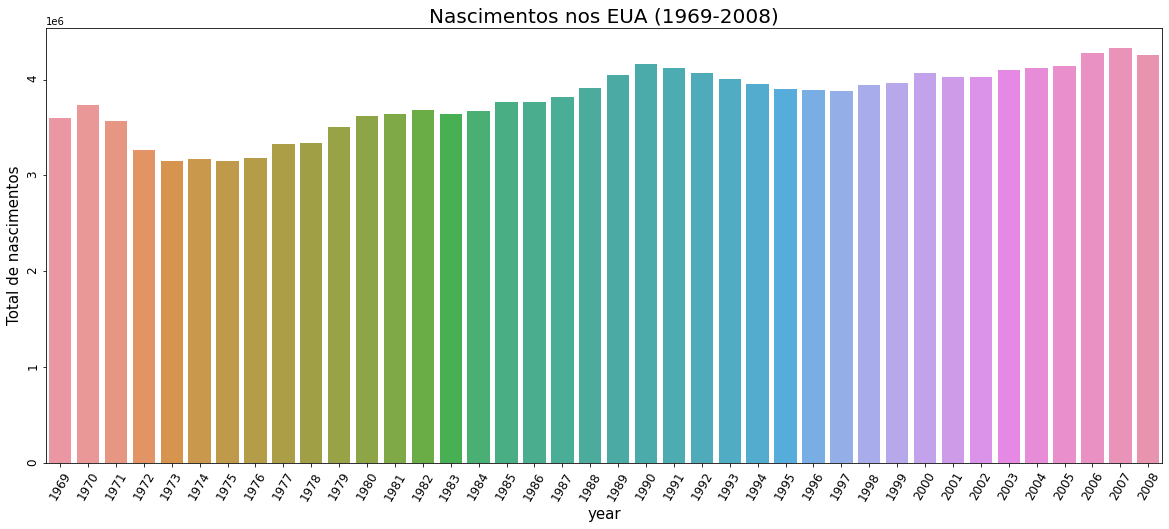

In [19]:
plt.figure(figsize=(20,8))

plt.title("Nascimentos nos EUA (1969-2008)", fontsize=20)

plt.xlabel('Year', fontsize=15)
plt.ylabel('Total de nascimentos', fontsize=15)

plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=12, rotation=90)

sns.barplot(x = anos, y = nascimentos_anos );

* Outra opção para gerar o mesmo gráfico...

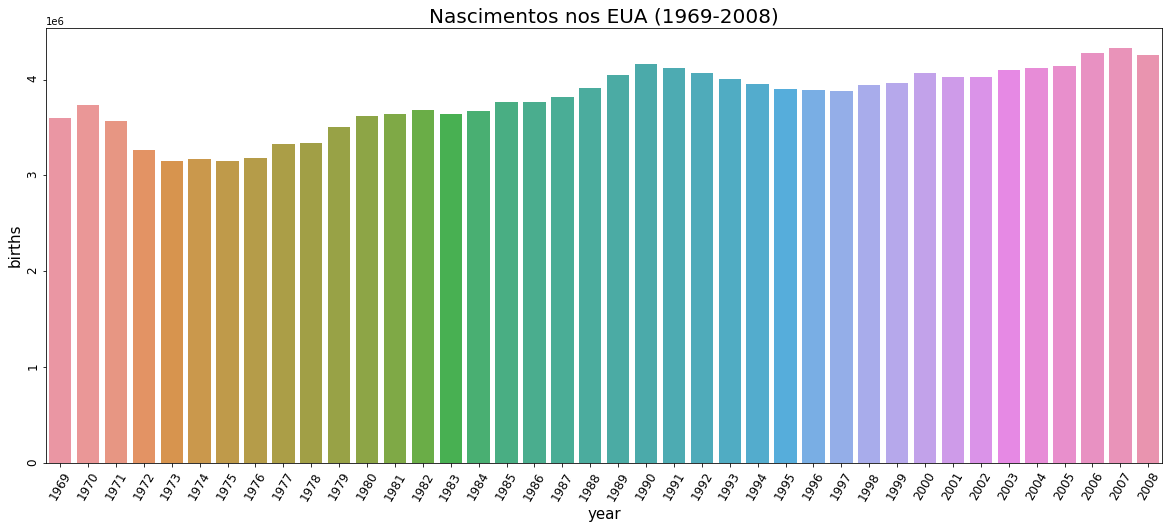

In [20]:
plt.figure(figsize=(20,8))

plt.title("Nascimentos nos EUA (1969-2008)", fontsize=20)

plt.xlabel('Year', fontsize=15)
plt.ylabel('Total de nascimentos', fontsize=15)

plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=12, rotation=90)

sns.barplot(x=births['year'], y=births['births'], estimator=np.sum, ci=None);

* Agora, queremos gerar um gráfico do total de nascimentos por década...

In [30]:
births['decade'] = 10 * (births['year'] // 10)

table2 = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum', margins=True)


table2.columns = pd.Index(['F','M','All'])
table2.index = pd.Index(['1960','1970','1980','1990','2000','All'])

table2

,F,M,All
1960,1753634,1846572,3600206
1970,16263075,17121550,33384625
1980,18310351,19243452,37553803
1990,19479454,20420553,39900007
2000,18229309,19106428,37335737
All,74035823,77738555,151774378


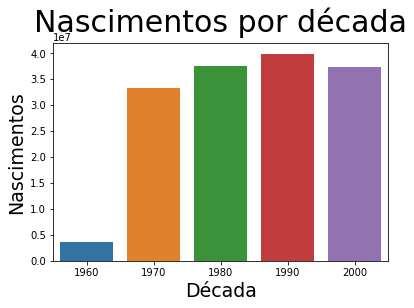

In [ ]:
# Iniciamos o gráfico de barras com a informação a ser representada graficamente.
plot = sns.barplot( x = table2.index[0:5], y = table2['All'][0:5], ci=None)

# Adicionar o título.
plot.set_title('Nascimentos por década', fontdict = {'fontsize': 30, 'verticalalignment':'bottom'})

# Ajustar a legenda dos eixos.
plot.set_xlabel('Década', fontdict = {'fontsize':19})
plot.set_ylabel('Nascimentos', fontdict = {'fontsize':19});

### Agora vamos fazer um gráfico separando por gênero

In [33]:
table2['decade'] = table2.index

In [40]:
table3 = table2.melt(id_vars=['decade'])

table3 = table3.loc[ (table3['decade'] != 'All') & (table3['variable'] != 'All')]

table3

,decade,variable,value
0,1960,F,1753634
1,1970,F,16263075
2,1980,F,18310351
3,1990,F,19479454
4,2000,F,18229309
6,1960,M,1846572
7,1970,M,17121550
8,1980,M,19243452
9,1990,M,20420553
10,2000,M,19106428


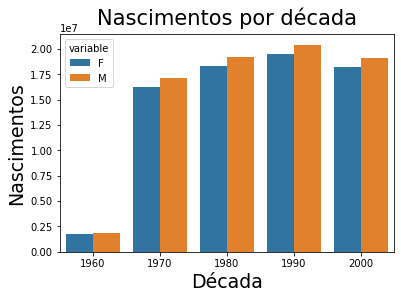

In [42]:
# Começar o gráfico
plot = sns.barplot(x = 'decade', y = 'value', hue = 'variable', data = table3, ci=None);

# Adicionar o título.
plot.set_title('Nascimentos por década', fontdict = {'fontsize': 21, 'verticalalignment':'bottom'} )

# Ajustar a legenda dos eixos.
plot.set_xlabel('Década', fontdict = {'fontsize':19})
plot.set_ylabel('Nascimentos', fontdict = {'fontsize':19})

plt.show()

## 5. Algumas formas de visualizar séries de tempo

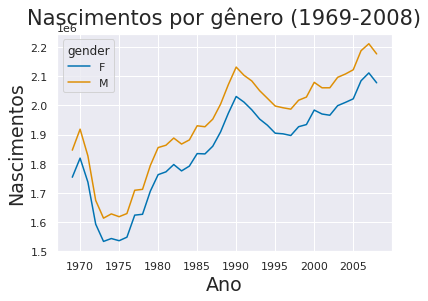

In [43]:
# Tomar estilos de Seaborn
sns.set(style="darkgrid", palette="colorblind", color_codes=True)  

#Criando plot
plot = births.pivot_table('births', index='year', 
columns='gender', aggfunc='sum').plot()

# Adicionar o título.
plot.set_title('Nascimentos por gênero (1969-2008)', fontdict = {'fontsize': 21, 'verticalalignment':'bottom'} )

# Ajustar a legenda dos eixos.
plot.set_xlabel('Ano', fontdict = {'fontsize':19})
plot.set_ylabel('Nascimentos', fontdict = {'fontsize':19});

* Agora plotar a proporção de homens

In [45]:
table['M/F'] = round(table['M'] / table['F'], 2)
table['%M'] = round(table['M'] / table['All'] * 100, 1)
table.head()

gender,F,M,All,M/F,%M
year,,,,,
1969,1753634,1846572,3600206,1.05,51.3
1970,1819164,1918636,3737800,1.05,51.3
1971,1736774,1826774,3563548,1.05,51.3
1972,1592347,1673888,3266235,1.05,51.2
1973,1533102,1613023,3146125,1.05,51.3


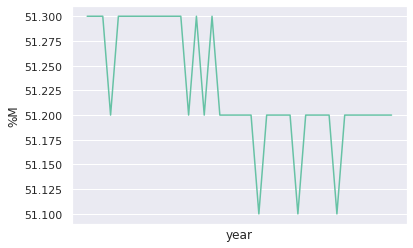

In [50]:
sns.set(style="darkgrid", palette="Set2")

# Gerar o eixo x com 40 posições (2008-1969) para usar cada um dos anos como tag.

plt.xticks([x for x in range(40)], table.index[:-1], rotation=90)

# Fazer o gráfico

sns.lineplot(data=table['%M'][:-1], legend=False);

## 3. Usando Dummies e filtros

* Gerar agora um `DataFrame` que contenha o `gender` como dummy: 

In [61]:
births = births.join(pd.get_dummies(births['gender'], prefix='gender', prefix_sep='_', drop_first=True))
births.head()

,year,month,day,gender,births,gender_M
0,1969,1,1.0,F,4046,0
1,1969,1,1.0,M,4440,1
2,1969,1,2.0,F,4454,0
3,1969,1,2.0,M,4548,1
4,1969,1,3.0,F,4548,0


* Eliminar a coluna `gender`

In [62]:
del births['gender']
births.head()

,year,month,day,births,gender_M
0,1969,1,1.0,4046,0
1,1969,1,1.0,4440,1
2,1969,1,2.0,4454,0
3,1969,1,2.0,4548,1
4,1969,1,3.0,4548,0


* Tanto homens quanto mulheres aparecem uma vez para cada dia, portanto, metade dos registros é de homens e a outra metade, de mulheres. 
* A média de todos os dias deve estar em 0.5 quando ambos os sexos forem informados

In [63]:
probabilidades = births.groupby(['day','month'])['gender_M'].aggregate('mean').unstack()
probabilidades

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1.0,0.5,0.500000,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5
2.0,0.5,0.500000,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5
3.0,0.5,0.500000,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5
4.0,0.5,0.500000,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5
5.0,0.5,0.500000,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5
6.0,0.5,0.500000,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5
7.0,0.5,0.500000,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5
8.0,0.5,0.500000,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5
9.0,0.5,0.500000,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5


* Vemos que não é assim com todos os meses.
* Observamos o mês de abril.

In [64]:
births[births['month'] == 4]

,year,month,day,births,gender_M
192,1969,4,1.0,4990,0
193,1969,4,1.0,4970,1
194,1969,4,2.0,4766,0
195,1969,4,2.0,5212,1
196,1969,4,3.0,4682,0
...,...,...,...,...,...
15482,2006,4,NaN,169341,1
15505,2007,4,NaN,165121,0
15506,2007,4,NaN,173674,1
15529,2008,4,NaN,169585,0


* Os dados incorretos geram alguns dias em que a proporção não é 50%

In [65]:
probabilidades[(probabilidades>0.5).any(1)]

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
31.0,0.5,0.5,0.5,0.470588,0.50,0.50000,0.5,0.500000,0.526316,0.500000,0.526316,0.5
99.0,0.5,0.5,0.5,0.466667,0.44,0.53125,0.5,0.517241,0.448276,0.571429,0.483871,0.5


In [66]:
probabilidades[(probabilidades<0.5).any(1)]

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
29.0,0.5,0.458333,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5
30.0,0.5,0.400000,0.5,0.500000,0.50,0.50000,0.5,0.500000,0.500000,0.500000,0.500000,0.5
31.0,0.5,0.500000,0.5,0.470588,0.50,0.50000,0.5,0.500000,0.526316,0.500000,0.526316,0.5
99.0,0.5,0.500000,0.5,0.466667,0.44,0.53125,0.5,0.517241,0.448276,0.571429,0.483871,0.5


## 6. Nascimentos por dia

* Agora vamos estudar a quantidade de nascimentos por dia para diferentes meses do ano.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

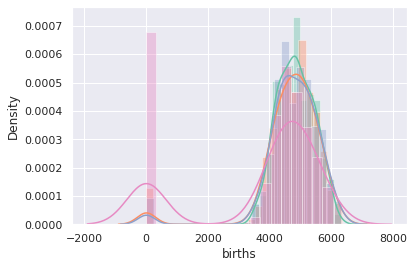

In [67]:
for i in range(28,32):
    sns.distplot(births['births'][(births['day']==i)]);

* O dia 28 mostra uma distribuição normal ao longo dos meses

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


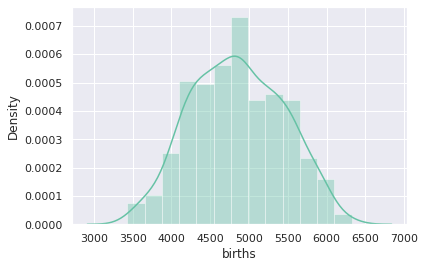

In [68]:
sns.distplot(births['births'][(births['day']==28)]);

* A partir do dia 29 é mostrado 0 para os meses que não aparecem 
* Os dados incorretos distorcem as distribuições nos dias restantes

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


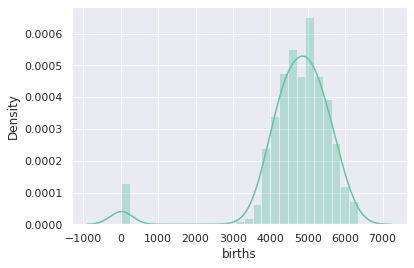

In [69]:
sns.distplot(births['births'][(births['day']==29)]);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


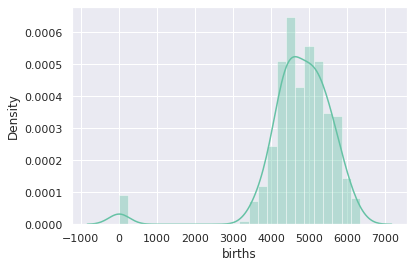

In [70]:
sns.distplot(births['births'][(births['day']==30)]);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


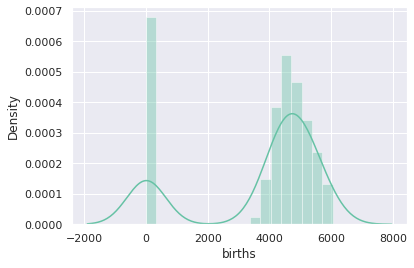

In [71]:
sns.distplot(births['births'][(births['day']==31)]);

* Você eliminaria algum registro? Por quê?
* Descobrimos que alguns dados estavam mal carregados no conjunto de dados original

In [72]:
births[births['month'] == 2].head(60)

,year,month,day,births,gender_M
64,1969,2,1.0,4394,0
65,1969,2,1.0,4736,1
66,1969,2,2.0,4334,0
67,1969,2,2.0,4480,1
68,1969,2,3.0,4878,0
69,1969,2,3.0,5110,1
70,1969,2,4.0,4796,0
71,1969,2,4.0,5200,1
72,1969,2,5.0,4674,0
73,1969,2,5.0,5002,1


Contando valores nulos em cada coluna do DataFrame

In [75]:
births.isnull().sum()

year          0
month         0
day         480
births        0
gender_M      0
dtype: int64

Temos dados nulos somente na coluna de dias. Se a minha análise precisasse somente de meses, anos, gêneros e quantidade de nascimentos, ela não seria afetada pelos valores faltantes.

Porém, se eu precisasse saber os dias específicos onde ocorrem esses valores, teria de lidar com eles.

Eu teria a opção de cortar esses valores e perder informações de anos, o que, ao meu ver, seria menos indicado do que ignorar a variável dia com valores nulos.

O mais indicado, mas demandaria entender qual problema estava sendo analisado, seria fechar o escopo da análise utilizando total de nascimento (total e por gênero) por meses e anos, pois aí as informações estariam completas.  

In [97]:
#DataFrame somente onde há valores nulos em dias
births_null_days = births[births['day'].isnull()]

births_null_days.head()

,year,month,day,gender,births
15067,1989,1,NaN,F,156749
15068,1989,1,NaN,M,164052
15069,1989,2,NaN,F,146710
15070,1989,2,NaN,M,154047
15071,1989,3,NaN,F,165889


In [98]:
# DataFrame original
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
